# Kaggle

In [8]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! cp kaggle.json ~/.kaggle

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 91% 60.0M/66.0M [00:00<00:00, 79.2MB/s]
100% 66.0M/66.0M [00:00<00:00, 75.5MB/s]


In [12]:
! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


# What is this data?

In [13]:
# getting a few powerups[libraries] to defend myself
# while practicing these dark arts.

# the basic
import numpy as np # for the math
import pandas as pd # for the excel

# the artistic
import matplotlib.pyplot as plt # for the figure
import seaborn as sns # for the figure 2: electric boogaloo

# the others
from sklearn.model_selection import train_test_split # to split it in twain
from imblearn.over_sampling import SMOTE # to pump up the numbers. just a little bit
from imblearn.under_sampling import RandomUnderSampler # the bringmedown
from sklearn.metrics import roc_auc_score

In [14]:
credit = pd.read_csv('creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [17]:
credit['Class'].value_counts()
# the fraud cases are in a minority
# we need more fraudsters!
# for better predictions ofcourse..

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


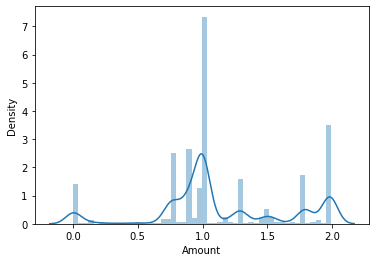

In [18]:
sns.distplot(credit[credit['Amount']<2]['Amount'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


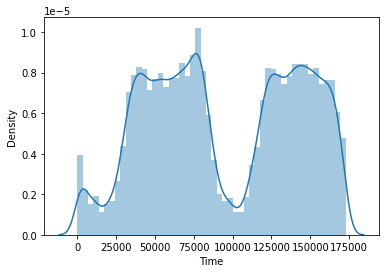

In [19]:
sns.distplot(credit['Time'])
plt.show()

In [20]:
# The Amount and Time are...all over the place
# if only they were more...scaled

# Going with Robust Scaler - better while dealing with outliers
from sklearn.preprocessing import RobustScaler

credit['Amount'] = RobustScaler().fit_transform(
    credit['Amount'].values.reshape(-1,1)
    )

credit['Time'] = RobustScaler().fit_transform(
    credit['Time'].values.reshape(-1,1)
    )

In [21]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,1.189142e-01,0.557903,-0.994983,-0.358210,0.000000,0.641790,1.035022
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [22]:
credit.shape

(284807, 31)

# Finding the secrets that this data hides.

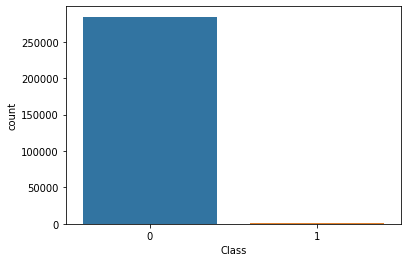

In [23]:
sns.countplot(x=credit['Class'])
plt.show()

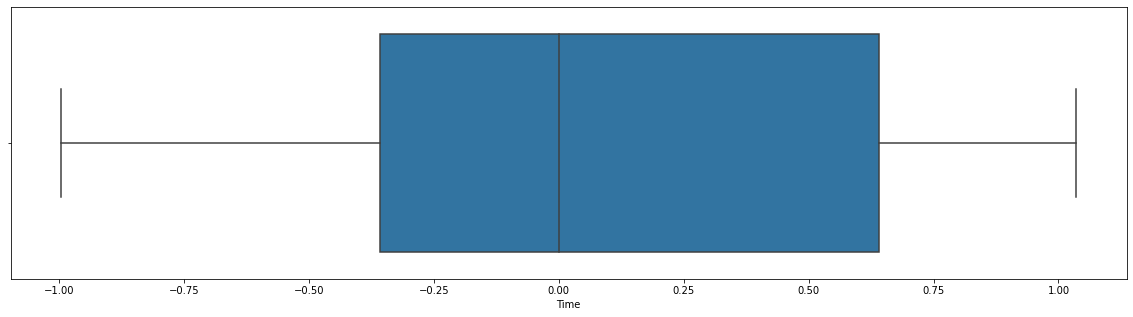

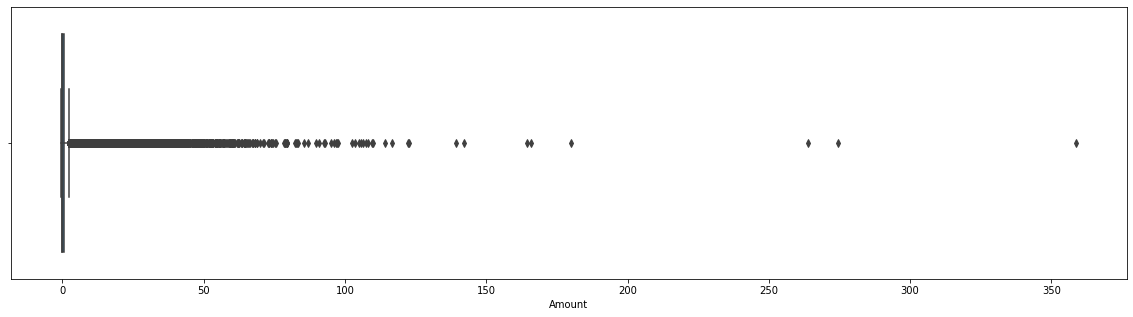

In [24]:
plt.figure(figsize=(20,5))
sns.boxplot(x=credit['Time'])
plt.show()
plt.figure(figsize=(20,5))
sns.boxplot(x=credit['Amount'])
plt.show()

# The Preparations

In [25]:
# The data Divorce [ How else are we supposed to get an ex]

X = credit.drop('Class',axis=1)
y = credit['Class']

In [26]:
from sklearn.model_selection import train_test_split as tts

Xtr,Xts,ytr,yts = tts(X,y,test_size=0.33,random_state=0)

Xtr.shape,Xts.shape,ytr.shape,yts.shape

((190820, 30), (93987, 30), (190820,), (93987,))

In [27]:
# separating the fraudsters from the normal public

fraud = credit[credit['Class']==1]
orgnl = credit[credit['Class']==0]

fraud.shape,orgnl.shape

((492, 31), (284315, 31))

In [28]:
# taking a sample of 492 nomral transactions to compare with the fraudsters

orgnl = orgnl.sample(frac=1,random_state=0)[:492]

orgnl.shape

(492, 31)

In [29]:
# creating the test group for a ... Fraudsters Anonymous if you may

fran = pd.concat([orgnl,fraud]).sample(frac=1,random_state=0)

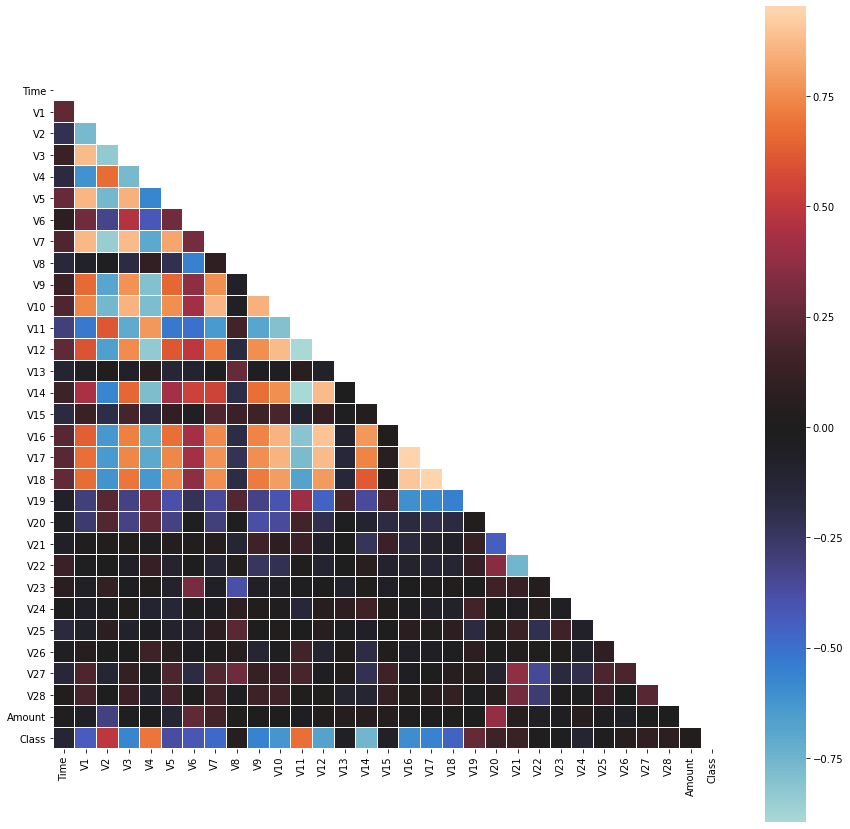

In [30]:
cor = fran.corr()

mask = np.zeros_like(cor,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(cor,mask=mask,center=0,square=True,linewidths=0.1)
plt.show()

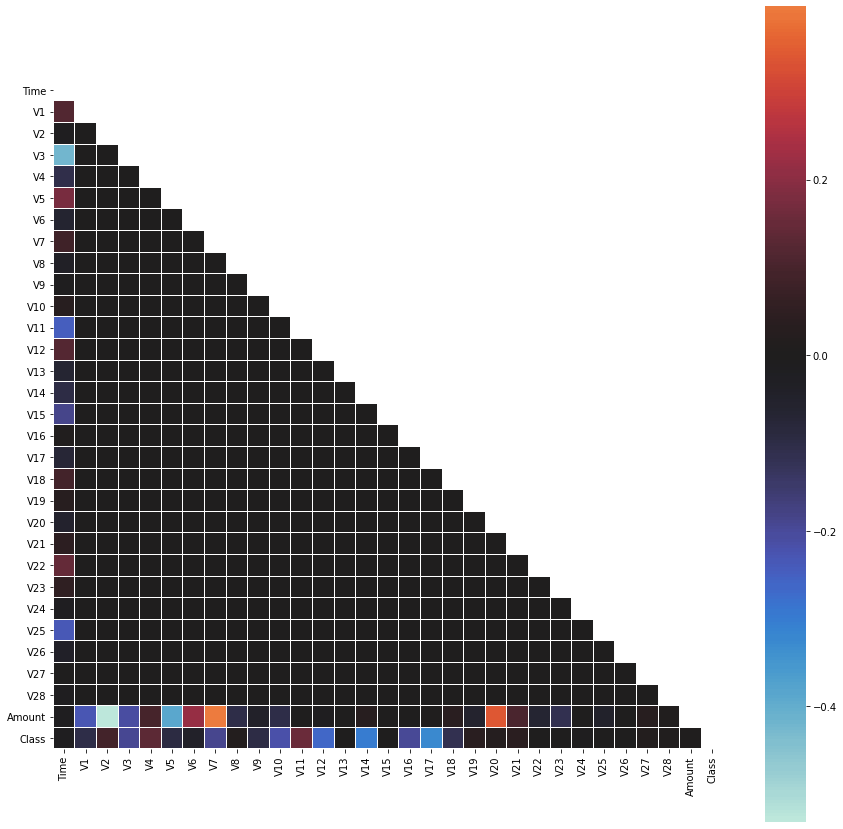

In [31]:
cor = credit.corr()

mask = np.zeros_like(cor,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(cor,mask=mask,center=0,square=True,linewidths=0.1)
plt.show()

In [32]:
credit.shape

(284807, 31)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

lgr = LogisticRegression(solver='liblinear',random_state=0)

lgr.fit(Xtr,ytr)

ypr = lgr.predict(Xts)

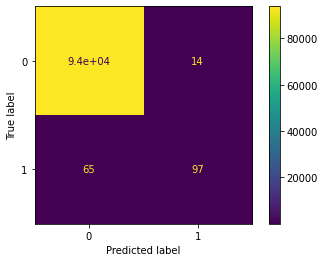

In [34]:
plot_confusion_matrix(lgr,Xts,yts)

In [35]:
print(confusion_matrix(yts,ypr))
print(classification_report(yts,ypr))

[[93811    14]
 [   65    97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.87      0.60      0.71       162

    accuracy                           1.00     93987
   macro avg       0.94      0.80      0.86     93987
weighted avg       1.00      1.00      1.00     93987



In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

classifiers = {'logr':LogisticRegression(solver='liblinear',random_state=0),
               'knn':KNeighborsClassifier(),
               'svc':SVC(random_state=0),
               'dt':DecisionTreeClassifier(random_state=0)}

for key,classifier in classifiers.items():
  classifier.fit(Xtr,ytr)
  ypr = classifier.predict(Xts)

  print(classifier.__class__.__name__,'\n',classification_report(yts,ypr),'\n\n')

LogisticRegression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.87      0.60      0.71       162

    accuracy                           1.00     93987
   macro avg       0.94      0.80      0.86     93987
weighted avg       1.00      1.00      1.00     93987
 


KNeighborsClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.92      0.74      0.82       162

    accuracy                           1.00     93987
   macro avg       0.96      0.87      0.91     93987
weighted avg       1.00      1.00      1.00     93987
 


SVC 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.93      0.70      0.80       162

    accuracy                           1.00     93987
   macro avg       0.97      0.85      0.90     93987
weighted avg      

In [40]:
from imblearn.over_sampling import SMOTE

Xtr,ytr = SMOTE().fit_resample(Xtr,ytr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [41]:
Xtr.shape,ytr.shape

((380980, 30), (380980,))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


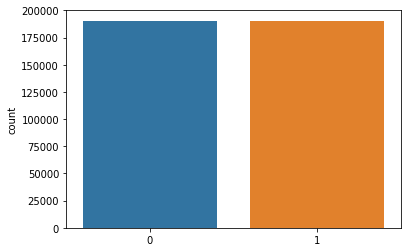

In [45]:
sns.countplot(ytr)
plt.show()

In [43]:
# knn 

knn = KNeighborsClassifier().fit(Xtr,ytr)

ypr = knn.predict(Xts)

print(classification_report(y_true=yts,y_pred=ypr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.50      0.86      0.63       162

    accuracy                           1.00     93987
   macro avg       0.75      0.93      0.82     93987
weighted avg       1.00      1.00      1.00     93987



In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(Xtr,ytr)

ypr = rfc.predict(Xts)

print(classification_report(y_true=yts,y_pred=ypr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.90      0.82      0.86       162

    accuracy                           1.00     93987
   macro avg       0.95      0.91      0.93     93987
weighted avg       1.00      1.00      1.00     93987



In [51]:
from xgboost import XGBClassifier,XGBRFClassifier

xgb = XGBClassifier().fit(Xtr,ytr)

ypr = xgb.predict(Xts.values)

print(classification_report(y_true=yts,y_pred=ypr))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     93825
           1       0.13      0.86      0.23       162

    accuracy                           0.99     93987
   macro avg       0.57      0.93      0.61     93987
weighted avg       1.00      0.99      0.99     93987



In [52]:
xgbr = XGBRFClassifier().fit(Xtr,ytr)

ypr = xgbr.predict(Xts.values)

print(classification_report(y_true=yts,y_pred=ypr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93825
           1       0.07      0.85      0.13       162

    accuracy                           0.98     93987
   macro avg       0.54      0.92      0.56     93987
weighted avg       1.00      0.98      0.99     93987

